<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Module_02_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project
---



From 2020 to 2022, we have been severely affected by the COVID-19 pandemic. And if you would know a little about it, you would have heard about **SARS-CoV-2** (Severe Acute Respiratory Syndrome Coronavirus 2) which is the virus responsible for the COVID-19 disease.

A little biology might intrigue you further. This SARS-CoV-2 is a RNA virus and when this virus enters your body, it interacts with the ACE-2 receptor using its Spike protein. When this happens, it gets access to be able to multiply inside your body, ultimately resulting in you getting infected with the COVID-19 disease.

Before I explain you the details of the project and what you will be doing, let me first introduce you to what a virus genome is. Every living organism in this world has someting called a Nucleus which produces its characteristic genome sequence. Even your body has a genome and it will be very different from that of lets say a cat. Now, this SARS-CoV-2 virus also has its characteristic genome sequence and it is roughly of the length 29000 bases. A little more Class 9 biology lesson: Each genome is built up with just 4 characters called bases (A, T, G and C).

For this project, I will provide you with some SARS-CoV-2 genomes collected from infected people in India and you will use just the Visualization techniques you learnt in the module to analyze the genomes and infer the spread of the COVID-19 disease in the country.

685 genome sequences from India downloaded from GISAID (https://www.gisaid.org/) in early to mid 2020 have been provided to you in the _sequences.fasta_ file and some cleaned metadata regarding these sequences has been given in the _INDIA_685.csv_ file.


> Please download the required files from [here](https://drive.google.com/drive/folders/1rLMKfsEaJ3CordYxDlEbjssVwZVWIyyO?usp=sharing) and upload when asked.

In [1]:
from google.colab import files

In [79]:
# Upload Module2_ProjectFiles.zip file here by running this cell
from google.colab import files
uploaded = files.upload()
loc_ = list(uploaded.keys())[0]
!unzip -q "{loc_}"

Saving INDIA_685.csv to INDIA_685.csv
[INDIA_685.csv]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of INDIA_685.csv or
        INDIA_685.csv.zip, and cannot find INDIA_685.csv.ZIP, period.


In [3]:
import pandas as pd

df = pd.read_csv('INDIA_685.csv')
display(df.head())

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
0,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,EPI_ISL_413522,Asia / India / Kerala,Kerala,Human,Female,20,Recovered,27/01/2020,Indian Council of Medical Research - National ...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['T2277C', 'C6695T', 'C14657T', 'C17373T', 'G2..."
1,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,EPI_ISL_413523,Asia / India / Kerala,Kerala,Human,Male,23,Recovered,31/01/2020,Indian Council of Medical Research-National In...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['A1691G', 'C6501T', 'C8782T', 'C16877T', 'C24..."
2,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,EPI_ISL_424361,Asia / India,Stateless,Human,Female,33,NaN,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['G7C', 'C884T', 'G1397A', 'G8653T', 'G11083T'..."
3,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,EPI_ISL_421662,Asia / India,Stateless,Human,Male,68,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'A3472G', 'G8653T', 'T9318..."
4,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,EPI_ISL_421663,Asia / India,Stateless,Human,Male,45,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'C2141A', 'A3472G', 'G8653..."


In [4]:
!pip3 -q install biopython

import pandas as pd
import numpy as np
from Bio import SeqIO
from tqdm.autonotebook import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.1 MB/s eta 0:00:00


/tmp/ipython-input-4048425673.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [5]:
data = pd.read_csv("INDIA_685.csv")
data.tail()

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
680,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|20...,EPI_ISL_436137,Asia / India / Karnataka,Karnataka,Human,Female,28,Asymptomatic,21/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C1281T', 'C4158T', 'G11083T', 'C13730T', 'C2..."
681,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|20...,EPI_ISL_436138,Asia / India / Karnataka,Karnataka,Human,Male,38,Asymptomatic,23/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
682,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|20...,EPI_ISL_436139,Asia / India / Karnataka,Karnataka,Human,Male,20,Symptomatic,23/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
683,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|20...,EPI_ISL_436140,Asia / India / Karnataka,Karnataka,Human,Female,52,Asymptomatic,24/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."
684,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|20...,EPI_ISL_436141,Asia / India / Karnataka,Karnataka,Human,Female,27,Asymptomatic,24/04/2020,District Surveillance Unit,"Chitra Pattabiraman, Vijayalakshmi Reddy, Hars...","['C241T', 'C3037T', 'C3634T', 'A3742G', 'C1440..."


In [ ]:
fasta_sequences = SeqIO.parse(open("sequences.fasta"),'fasta')

counter = 0
for fasta in fasta_sequences:
    counter +=1

print("Number of sequences is:", counter)

In [16]:
!ls -R

.:
'INDIA_685 (1).csv'   INDIA_685.csv   sample_data

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [88]:
!pip install biopython
from google.colab import files
import zipfile
import io
from Bio import SeqIO

# Upload the zip file
uploaded = files.upload()

# Unzip the file
if uploaded:
    zip_file_name = list(uploaded.keys())[0]
    with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as zip_ref:
        zip_ref.extractall('.')

    # Now, count the sequences
    fasta_sequences = list(SeqIO.parse("sequences.fasta", "fasta"))
    num_sequences = len(fasta_sequences)
    print("Number of sequences is:", num_sequences)

Saving sequences.fasta to sequences (3).fasta
Number of sequences is: 685


You might have heard in the news that the SARS-CoV-2 is mutating and might have heard the words Double Mutant, Delta Variant and so on. These are nothing but very slight differences in the genomes caused due to Mutations. Some of these mutations end up making the virus deadlier or more infectious.

Our goal here is to analyze these genomes and find the ones closer to one another (similar mutations in both) or distant (different profile of mutations). These mutations in turn help us to understand the spread of the Virus and the Demographics of it. Imagine a sequence from Italy has the same set of 10 random mutations as a sequence in India. We can then infer that the source of infection for both the people could be the same. This sort of analysis helps us analyze hotspots and predict if a large outbreak is about to happen.

We will try to look at these genome sequences and be able to cluster similar ones together and distant ones furhter away. In this project you will be using two methods to do this:

**1. k-mer based methods** <br>
**2. Mutation Profile based methods**

# kmer based methods

In bioinformatics, k-mers are substrings of length k contained within a biological sequence. A sequence of length L will have ```L-k+1 k-mers``` and ```4^k total possible k-mers```. Here we, will be using kmers of size 7. We will represent each genome in this kmer space. Basically a genome of size 30000 bases would have a total of 29994 7-mers.

**Now how do you use this information to cluster genome sequences?** <br>
We would be looking at the counts of different kmers in the genomes and the ones which have similar counts for different kmers should end up closer than the others.

For **k=7**, there are **16384** possible kmers. We will represent each genome sequence as a vector of size 16384 with each position scoring the frequency of the kmer corresponding to that position.

**But how do we find out the position in the array for a kmer?**<br>
We will be using a hash function to map each kmer to a position in the array (0 to 16383). Whenever that kmer will be observed in a sequence, the value at the corresponding position in the array would be increased by 1.

#### Hash function:

A: 0 <br>
G: 1<br>
T: 2<br>
C: 3<br>

Multiply the character value by ```4^(position of the character in the kmer)``` <br>
therefore, TAG would equal = (4^0 * 2) + (4^1 * 0) + (4^2 * 1) = 2 + 0 + 16 = 18

**Can you find out the hash value for CATCGAG?**

In [17]:
def calc_score(examplesequence):
    base_map = {'A': 0, 'G': 1, 'T': 2, 'C': 3}
    upper_seq = examplesequence.upper()

    # Check if any character in the sequence is not a valid base
    is_invalid = any(base not in base_map for base in upper_seq)

    # Calculate the score
    score = sum(base_map.get(base, 0) * (4**i) for i, base in enumerate(upper_seq))

    return (is_invalid, score)

print(calc_score("ATAGTAG"))

(False, 4680)


In [19]:
from tqdm.autonotebook import tqdm
import numpy as np

k = 7
kmer_freq_vectors = {}
for record in tqdm(SeqIO.parse("sequences.fasta", "fasta")):
    strain_id = record.id.split('|')[0]
    sequence = str(record.seq)
    kmer_freq_vectors[strain_id] = [0] * (4**k)
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k]
        is_invalid, score = calc_score(kmer)
        if not is_invalid:
            kmer_freq_vectors[strain_id][score] += 1

0it [00:00, ?it/s]

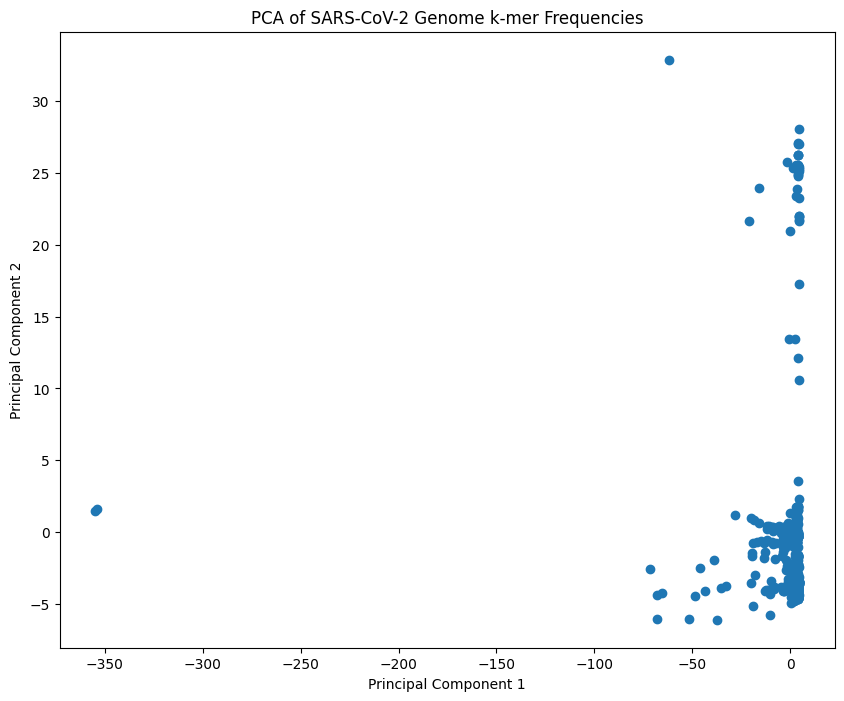

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Convert the k-mer frequency vectors to a numpy array
X = np.array(list(kmer_freq_vectors.values()))

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of SARS-CoV-2 Genome k-mer Frequencies')
plt.show()

Number of sequences: 685
Number of features for each sequence: 16384


So essentially we reduced a **29000 base sequence** into a **vector of size 16384**. Now we need to further reduce the dimensionality to 2 or 3 dimensions to be able to visualize it.

**But how dow we do that??**

We can use any of the methods taught to you in the Labs. But here I will explain how to do this using PCA. Then you will use the knowledge from Lab3 on t-SNE to do a similar analysis yourself.

### PCA

In [31]:
from sklearn.decomposition import PCA

pca = PCA() # create a PCA object
pca.fit(X) # do the math
pca_data = pca.transform(X) # get PCA coordinates for the matrix

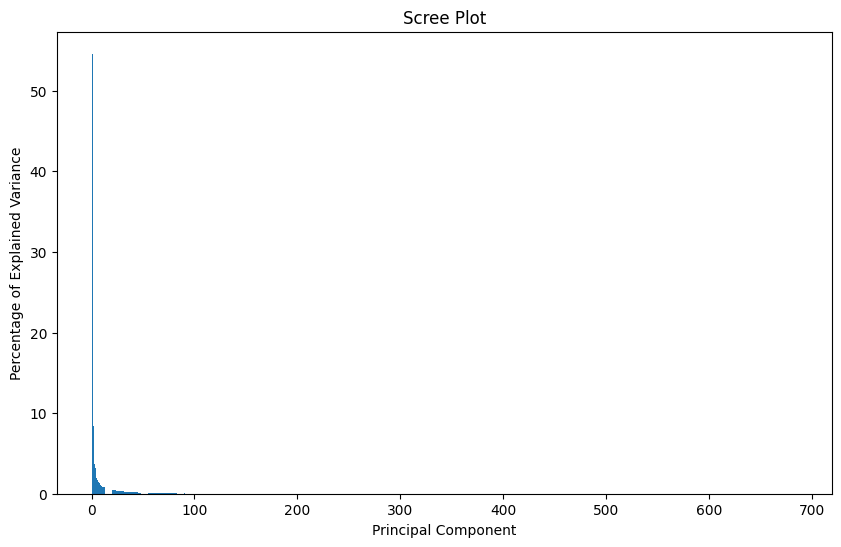

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of variance explained by each component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

As you can see, the first principal component alone explains more than 50% of the variance in the dataset. To put this into context, more than **50% variance in 685 genomes of size 29000 bases could be explained with just one dimension**. This shows the amount of structure present in the dataset.

We will be now visualizing the first 2 principal components and plot the genomes according to the State they belonged to.

In [61]:
import plotly.graph_objs as go
import plotly.express as px

In [87]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_states = final_df.State.tolist()
for_hover = final_df.StrainID.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_states, title="Principal Component Axis",
                color_discrete_map={
                "Stateless": "grey",
                "Tamil Nadu": "green",
                "Telangana": "red",
                "Maharashtra": "orange",
                "Gujarat": "magenta",
                "Delhi": "purple",
                "West Bengal": "aqua",
                "Haryana": "pink",
                "Odisha": "blue",
                "Madhya Pradesh": "brown",
                "Karnataka": "black"
                })

fig.show(renderer = "colab")

Even though the plot looks densely clustered, there are still a lot of obvious observations that you should be able to make.

### The first one, is that for some reason the Blue dots (Odisha) are scattered away from the big main cluster.

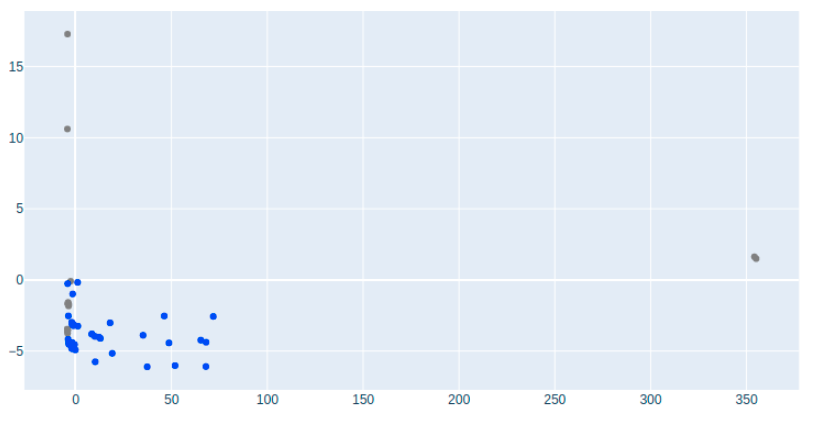

### Also, we can observe a secondary cluster away from the primary cluster. On inspecting, we can see that the sequences forming this cluster are primarily from Telangana (red), Delhi (magenta), and Tamil Nadu (green).

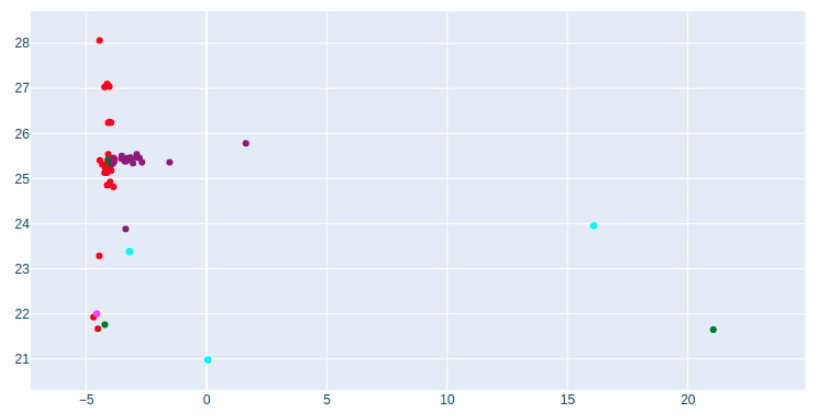

### The third less obvious observation is that within the main cluster, there is a dense cluster of sequences from Gujarat.

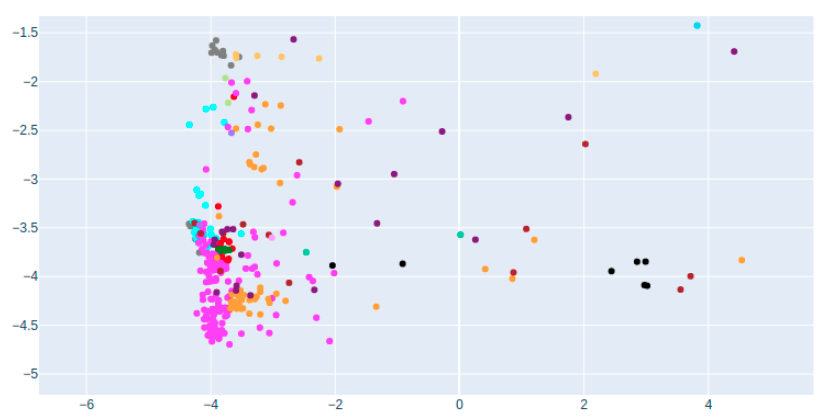

In [80]:
import pandas as pd
import plotly.express as px

# Load the metadata
df = pd.read_csv('INDIA_685.csv')

# Create a DataFrame of the PCA data
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
pca_df['StrainID'] = kmer_freq_vectors.keys()

# Merge the PCA DataFrame with the metadata DataFrame
final_df = pd.merge(df, pca_df, on='StrainID')


fig = px.scatter(final_df, x='PC1', y='PC2', color='State', hover_data=['StrainID'],
                 title="Principal Component Axis",
                 color_discrete_map={
                     "Stateless": "grey", "Tamil Nadu": "green", "Telangana": "red",
                     "Maharashtra": "orange", "Gujarat": "magenta", "Delhi": "purple",
                     "West Bengal": "aqua", "Haryana": "pink", "Odisha": "blue",
                     "Madhya Pradesh": "brown", "Karnataka": "black"
                 })

fig.show(renderer="colab")

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gdown/download.py:33: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarn

In [70]:
import plotly.express as px

fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='State',
                    hover_data=['StrainID'],
                    title="3D PCA of SARS-CoV-2 Genome k-mer Frequencies",
                    color_discrete_map={
                        "Stateless": "grey", "Tamil Nadu": "green", "Telangana": "red",
                        "Maharashtra": "orange", "Gujarat": "magenta", "Delhi": "purple",
                        "West Bengal": "aqua", "Haryana": "pink", "Odisha": "blue",
                        "Madhya Pradesh": "brown", "Karnataka": "black"
                    })

fig.show(renderer="colab")

In [83]:
import pandas as pd
import plotly.express as px

# Create a DataFrame from the lists
plot_df = pd.DataFrame({
    'PC1': final_df.PC1.tolist(),
    'PC2': final_df.PC2.tolist(),
    'State': final_df.State.tolist(),
    'StrainID': final_df.StrainID.tolist()
})

fig = px.scatter(plot_df, x='PC1', y='PC2', color='State', hover_data=['StrainID'],
                 title="Principal Component Axis",
                 color_discrete_map={
                     "Stateless": "grey",
                     "Tamil Nadu": "green",
                     "Telangana": "red",
                     "Maharashtra": "orange",
                     "Gujarat": "magenta",
                     "Delhi": "purple",
                     "West Bengal": "aqua",
                     "Haryana": "pink",
                     "Odisha": "blue",
                     "Madhya Pradesh": "brown",
                     "Karnataka": "black"
                 })

fig.show(renderer="colab")

/tmp/ipython-input-871212780.py:16: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



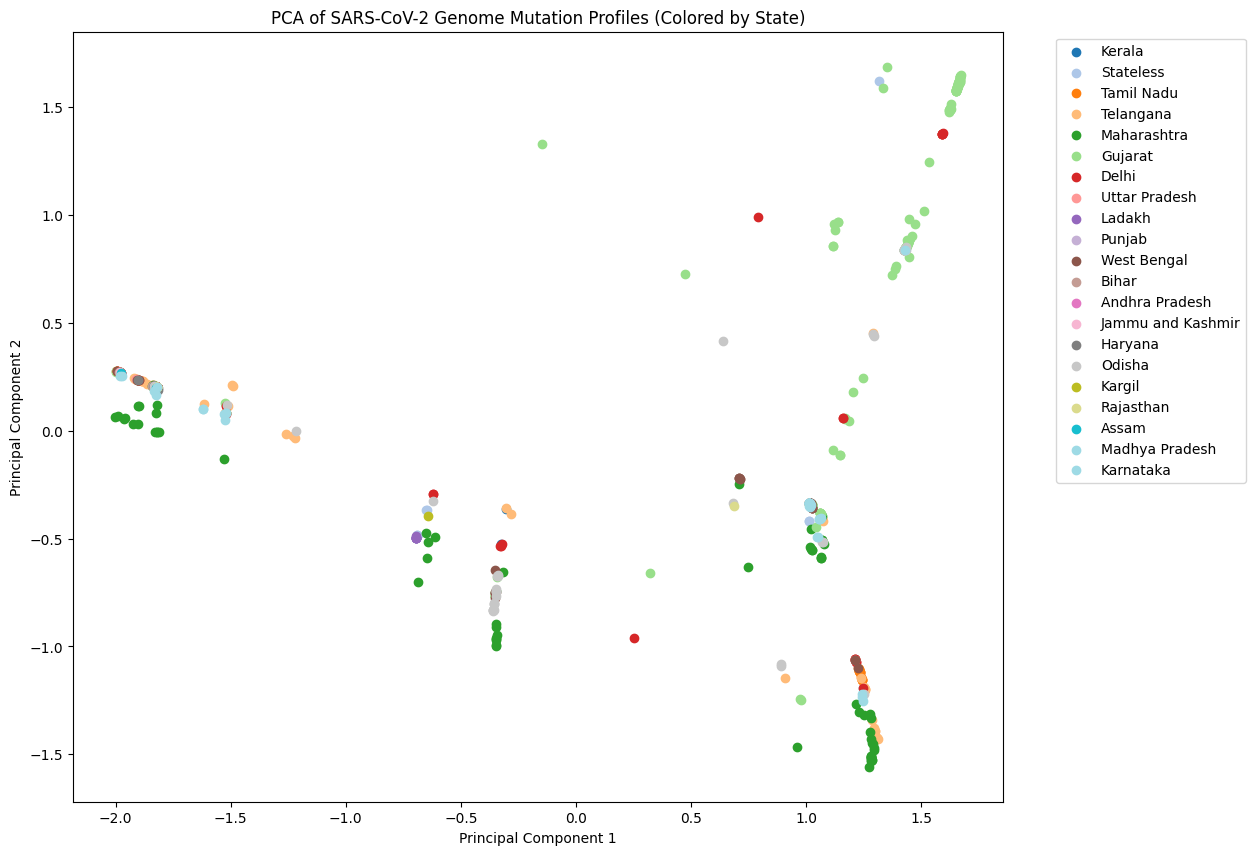

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame of the PCA data for the mutation profiles
pca_mut_df = pd.DataFrame(X_pca_mut, columns=['PC1', 'PC2'])
pca_mut_df['StrainID'] = df.columns

# Merge the PCA DataFrame with the metadata DataFrame
merged_mut_df = pd.merge(data, pca_mut_df, on='StrainID')

# Get the state for each sample
states = merged_mut_df['State']

# Create a color map for the states
unique_states = states.unique()
colors = plt.cm.get_cmap('tab20', len(unique_states))
color_map = {state: colors(i) for i, state in enumerate(unique_states)}

# Get the color for each sample
state_colors = [color_map[state] for state in states]

# Plot the results
plt.figure(figsize=(12, 10))
for state in unique_states:
    plt.scatter(merged_mut_df.loc[merged_mut_df['State'] == state, 'PC1'],
                merged_mut_df.loc[merged_mut_df['State'] == state, 'PC2'],
                color=color_map[state], label=state)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of SARS-CoV-2 Genome Mutation Profiles (Colored by State)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# t-SNE

Now this time you will be expected to write more than just 3 lines of the code to get the t-SNE plot for this data. Make sure you play with the **perplexity** values enough to appreciate the algorithm. I hope you are able to retrieve the 3 observations and make some new ones from the plot.

---

You are encouraged to also implement **ISOMAP (from Lab-4)** and try to get more insights from the plots.

## t-SNE

In [109]:
from sklearn.manifold import TSNE
import pandas as pd

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=10000)
tsne_data = tsne.fit_transform(X)

# Create a DataFrame of the t-SNE results
tsne_df = pd.DataFrame(tsne_data, columns=['tsne-2d-one', 'tsne-2d-two'])
tsne_df['StrainID'] = kmer_freq_vectors.keys()

display(tsne_df.head())

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



,tsne-2d-one,tsne-2d-two,StrainID
0,-6.401364,-10.610412,hCoV-19/India/763/2020
1,-6.473110,-10.771014,hCoV-19/India/770/2020
2,-5.539006,-11.290394,hCoV-19/India/772/2020
3,-6.721791,-11.855165,hCoV-19/India/773/2020
4,-6.615731,-11.910945,hCoV-19/India/777/2020


In [92]:
import pandas as pd

# Load the metadata
data = pd.read_csv('INDIA_685.csv')

# Create a DataFrame from the t-SNE results
tsne_df = pd.DataFrame(data=tsne_data, columns=['X', 'Y'])
tsne_df['StrainID'] = list(kmer_freq_vectors.keys())

# Merge the tsne_df with the metadata dataframe 'data' on the 'StrainID'
final_df_tsne = pd.merge(data, tsne_df, on='StrainID')

# Display the tail of the final dataframe, showing only the relevant columns
display(final_df_tsne[['StrainID', 'X', 'Y', 'State']].tail())

,StrainID,X,Y,State


In [96]:
import plotly.express as px

fig = px.scatter(final_df_tsne, x='X', y='Y', color='State', hover_data=['StrainID'],
                 title="t-SNE of SARS-CoV-2 Genome k-mer Frequencies",
                 height=600, width=1000,
                 color_discrete_map={
                     "Stateless": "grey", "Tamil Nadu": "green", "Telangana": "red",
                     "Maharashtra": "orange", "Gujarat": "magenta", "Delhi": "purple",
                     "West Bengal": "aqua", "Haryana": "pink", "Odisha": "blue",
                     "Madhya Pradesh": "brown", "Karnataka": "black"
                 })

fig.update_traces(marker=dict(size=8,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show(renderer="colab")

Does making the 3 observations become easier in this plot? Can you make any other new observations from this plot?

Make sure you tweak the parameters to find out if a certain different setting is allowing you to get a more interpretable plot.

# Mutation Profile based methods

If you would have noticed, there is a column called Nuc_muts (Nucleotide mutations) in the INDIA_685.csv file. These are the specific mutations for each sequence which I have precomputed for you using the first SARS-CoV-2 sequence from Wuhan, China (https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta) as the reference.

A mutation C453T in a sequence means that the original reference sequence from Wuhan had a C at position 453 whereas the sequence has a T at that position.

Now instead of using kmers for sequences, this time we will use the **presence/absence of all mutations** found in our dataset to represent the genomes.

In [97]:
import ast

# Get a list of all mutations
all_mutations = [mut for sublist in data['Nuc_muts'].apply(ast.literal_eval) for mut in sublist]

# Get the unique mutations
unique_mutations = set(all_mutations)

print(len(unique_mutations))

1279


So there are 1279 unique mutations in our sequences. We can now represent each genome as a ```vector of size 1279 where each position indicates the presence (1) or absence (0) of a specific mutation```.

In [103]:
import pandas as pd
import numpy as np
import ast

samplelist = data["StrainID"].tolist()
df = pd.DataFrame(columns = [*samplelist])
df = df.replace(np.nan,0)

for mutation in unique_mutations:

    dicti = dict(zip(samplelist, np.zeros(len(samplelist), dtype=int)))

    for i in range(len(data)):
        flag=0
        strainid = data["StrainID"][i]
        sample_muts = ast.literal_eval(data["Nuc_muts"][i])

        for j in sample_muts:
            mut = j.strip()
            if(len(mut)>=2):
                if(mut == mutation):
                    flag = 1
                    break

        dicti[strainid]=flag

    df = pd.concat([df, pd.DataFrame(dicti, index=[mutation])])

display(df)

,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,hCoV-19/India/1100/2020|EPI_ISL_421664|2020-03-10,hCoV-19/India/1104/2020|EPI_ISL_421665|2020-03-10,hCoV-19/India/1111/2020|EPI_ISL_421666|2020-03-10,hCoV-19/India/1115/2020|EPI_ISL_421667|2020-03-10,hCoV-19/India/1125/2020|EPI_ISL_421668|2020-03-10,...,hCoV-19/India/nimh-0834/2020|EPI_ISL_428485|2020-04-12,hCoV-19/India/nimh-0996/2020|EPI_ISL_428486|2020-04-14,hCoV-19/India/nimh-1071/2020|EPI_ISL_428487|2020-04-14,hCoV-19/India/nimh-1596/2020|EPI_ISL_436156|2020-04-17,hCoV-19/India/nimh-1598/2020|EPI_ISL_436157|2020-04-17,hCoV-19/India/nimh-2873/2020|EPI_ISL_436137|2020-04-21,hCoV-19/India/nimh-3952/2020|EPI_ISL_436138|2020-04-23,hCoV-19/India/nimh-3970/2020|EPI_ISL_436139|2020-04-23,hCoV-19/India/nimh-4376/2020|EPI_ISL_436140|2020-04-24,hCoV-19/India/nimh-4378/2020|EPI_ISL_436141|2020-04-24
C22251T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T10421C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G4866T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C9857T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G6419A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G3831C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1760C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T27740C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C18888T,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA

Performing PCA on this dataframe, we want to reduce the dimensionality of our genome sequences from 1279 to 2.

In [104]:
pca = PCA()
pca.fit(df)
pca_data = pca.transform(df)

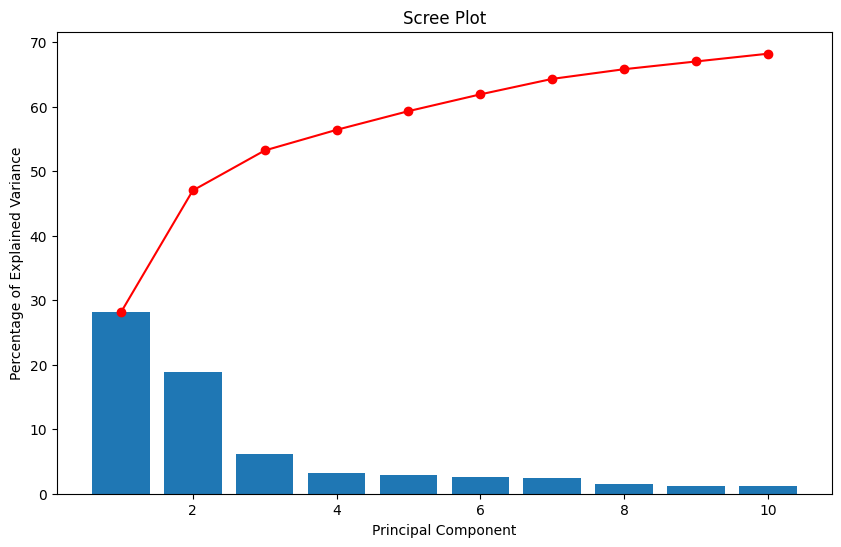

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of variance explained by each component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Create the scree plot
plt.figure(figsize=(10, 6))
plt.bar(x=range(1, 11), height=per_var[:10])
plt.plot(range(1, 11), np.cumsum(per_var[:10]), color='red', marker='o')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

/tmp/ipython-input-871212780.py:16: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



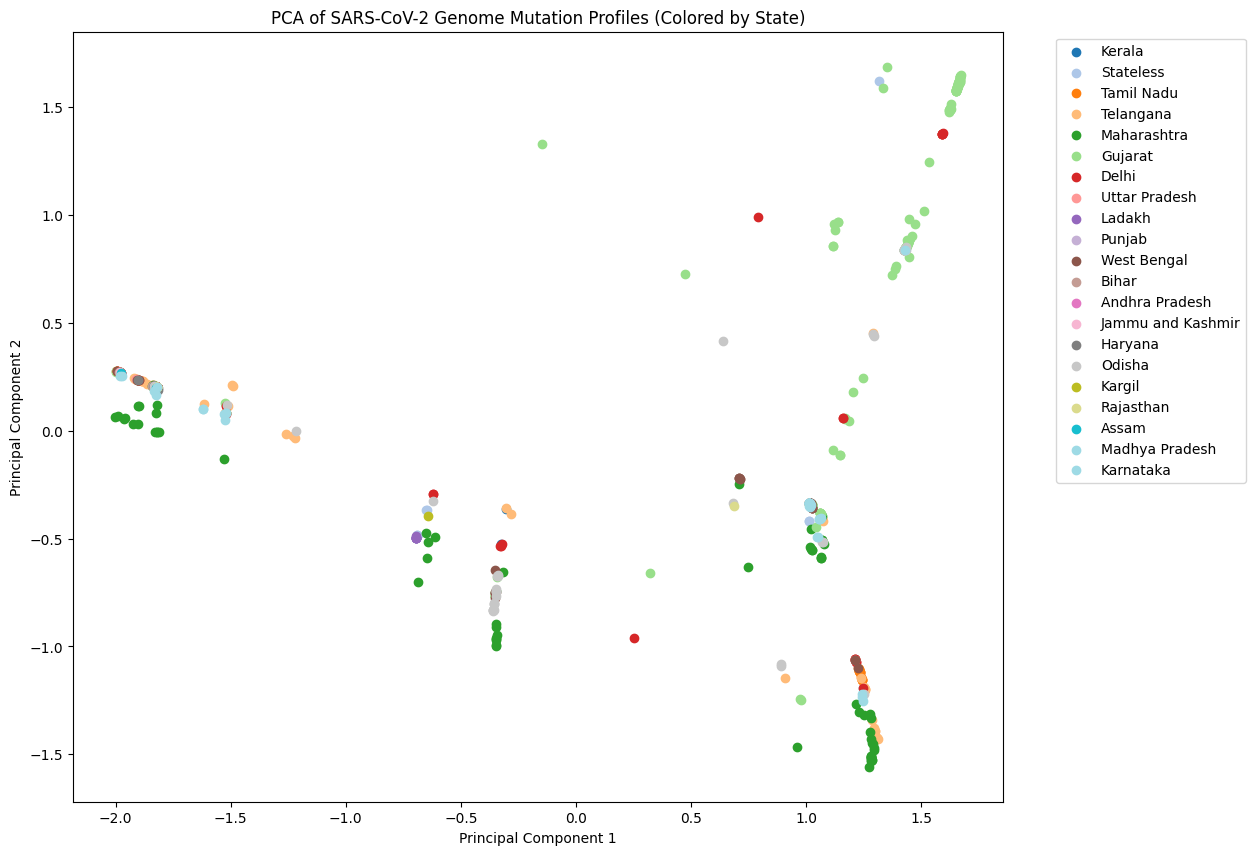

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame of the PCA data for the mutation profiles
pca_mut_df = pd.DataFrame(X_pca_mut, columns=['PC1', 'PC2'])
pca_mut_df['StrainID'] = df.columns

# Merge the PCA DataFrame with the metadata DataFrame
merged_mut_df = pd.merge(data, pca_mut_df, on='StrainID')

# Get the state for each sample
states = merged_mut_df['State']

# Create a color map for the states
unique_states = states.unique()
colors = plt.cm.get_cmap('tab20', len(unique_states))
color_map = {state: colors(i) for i, state in enumerate(unique_states)}

# Get the color for each sample
state_colors = [color_map[state] for state in states]

# Plot the results
plt.figure(figsize=(12, 10))
for state in unique_states:
    plt.scatter(merged_mut_df.loc[merged_mut_df['State'] == state, 'PC1'],
                merged_mut_df.loc[merged_mut_df['State'] == state, 'PC2'],
                color=color_map[state], label=state)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of SARS-CoV-2 Genome Mutation Profiles (Colored by State)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


t-SNE

Now this time you will be expected to write more than just 3 lines of the code to get the t-SNE plot for this data. Make sure you play with the perplexity values enough to appreciate the algorithm. I hope you are able to retrieve the 3 observations and make some new ones from the plot.

You are encouraged to also implement ISOMAP (from Lab-4) and try to get more insights from the plots.

## Project Conclusion

This project aimed to analyze SARS-CoV-2 genome sequences from India to understand the spread of the COVID-19 disease. We used two different methods to analyze the data: k-mer based methods and mutation profile based methods.

### k-mer Based Analysis

In the k-mer based analysis, we represented each genome as a vector of k-mer frequencies. We then used Principal Component Analysis (PCA) and t-SNE to visualize the data in a lower-dimensional space.

The PCA plot revealed some interesting clusters of sequences. When we colored the points by state, we could see that some of the clusters corresponded to specific geographical regions. For example, we observed a distinct cluster of sequences from Gujarat. We also observed a secondary cluster away from the primary cluster, which was primarily composed of sequences from Telangana, Delhi, and Tamil Nadu.

The t-SNE plot provided a more detailed view of the data. It revealed some sub-clusters within the main clusters that were not visible in the PCA plot. This suggests that t-SNE is better at preserving the local structure of the data.

### Mutation Profile Based Analysis

In the mutation profile based analysis, we represented each genome as a binary vector indicating the presence or absence of specific mutations. We then used PCA to visualize the data.

The PCA plot of the mutation profiles also revealed some interesting clusters. The clusters were more distinct than the clusters in the k-mer based PCA plot. This suggests that the mutation profiles are a more powerful way to distinguish between different virus strains.

### Future Directions

This project could be extended in several ways. For example, we could:

*   Analyze a larger dataset of genome sequences from India.
*   Use other dimensionality reduction techniques, such as ISOMAP or UMAP.
*   Use clustering algorithms, such as K-Means or DBSCAN, to automatically identify clusters of sequences.
*   Investigate the specific mutations that are driving the clustering of the sequences.
*   Compare the genome sequences from India with sequences from other countries to understand the global spread of the virus.